In [17]:
from datasets import ImageDataSets
from skimage import io
import os
from os.path import join
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import numpy as np

In [2]:
root_dir = 'data'
ImageDataset = ImageDataSets(root_dir)

In [5]:
dataloader = DataLoader(ImageDataset, batch_size=1, shuffle=True)

In [26]:
for i_batch, sample_batched in enumerate(dataloader):
    if i_batch == 3:
        plt.imshow(np.squeeze(sample_batched.numpy()))
        break

KeyboardInterrupt: 

In [21]:
image = sample_batched.numpy()

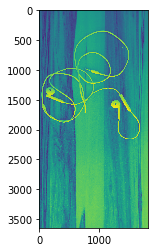

In [25]:
plt.imshow(np.squeeze(image))

In [23]:
image

array([[[100, 100, 100, ..., 117, 117, 117],
        [100,  99,  99, ..., 117, 117, 117],
        [ 99,  98,  98, ..., 117, 117, 117],
        ...,
        [114, 117, 122, ..., 203, 203, 203],
        [113, 120, 127, ..., 203, 203, 203],
        [110, 120, 127, ..., 203, 203, 203]]], dtype=uint8)